Полубаров Александр РТ5-61б. Рубежный контроль №1.
Номер варианта 13
Номер задачи 2
Номер набора данных, указанного в задаче 5

Для студентов группы РТ5-61Б - для пары произвольных колонок данных построить график "Jointplot".
Задача №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('data/states_all_extended.csv', sep=",")

In [3]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.dtypes

PRIMARY_KEY              object
STATE                    object
YEAR                      int64
ENROLL                  float64
TOTAL_REVENUE           float64
                         ...   
G08_AM_A_MATHEMATICS    float64
G08_HP_A_READING        float64
G08_HP_A_MATHEMATICS    float64
G08_TR_A_READING        float64
G08_TR_A_MATHEMATICS    float64
Length: 266, dtype: object

In [5]:
data.shape

(1715, 266)

In [6]:
data.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       ...
       'G08_HI_A_READING', 'G08_HI_A_MATHEMATICS', 'G08_AS_A_READING',
       'G08_AS_A_MATHEMATICS', 'G08_AM_A_READING', 'G08_AM_A_MATHEMATICS',
       'G08_HP_A_READING', 'G08_HP_A_MATHEMATICS', 'G08_TR_A_READING',
       'G08_TR_A_MATHEMATICS'],
      dtype='object', length=266)

In [7]:
data.isnull().sum()

PRIMARY_KEY                0
STATE                      0
YEAR                       0
ENROLL                   491
TOTAL_REVENUE            440
                        ... 
G08_AM_A_MATHEMATICS    1655
G08_HP_A_READING        1701
G08_HP_A_MATHEMATICS    1702
G08_TR_A_READING        1574
G08_TR_A_MATHEMATICS    1570
Length: 266, dtype: int64

## Jointplot для ENROLL и TOTAL_REVENUE

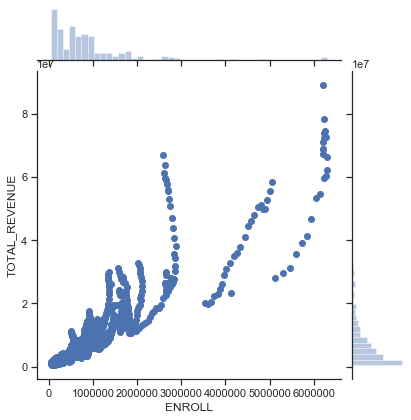

In [8]:
sns.jointplot(x='ENROLL', y='TOTAL_REVENUE', data=data)

## Обработка пропусков в числовых данных

In [9]:
total_count = data.shape[0]

In [10]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ENROLL. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка TOTAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка FEDERAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка STATE_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка LOCAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка TOTAL_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка INSTRUCTION_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка SUPPORT_SERVICES_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка OTHER_EXPENDITURE. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка CAPITAL_OUTLAY_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка A_A_A. Тип данных float64. Количество пустых значений 83, 4.84%.
Колонка G01_A_A. Тип данных float64. Количество пустых з

Колонка G09_HI_F. Тип данных float64. Количество пустых значений 1307, 76.21%.
Колонка G09_HI_M. Тип данных float64. Количество пустых значений 1307, 76.21%.
Колонка G09_HP_F. Тип данных float64. Количество пустых значений 1352, 78.83%.
Колонка G09_HP_M. Тип данных float64. Количество пустых значений 1351, 78.78%.
Колонка G09_TR_F. Тип данных float64. Количество пустых значений 1344, 78.37%.
Колонка G09_TR_M. Тип данных float64. Количество пустых значений 1344, 78.37%.
Колонка G09_WH_F. Тип данных float64. Количество пустых значений 1307, 76.21%.
Колонка G09_WH_M. Тип данных float64. Количество пустых значений 1307, 76.21%.
Колонка G10_AM_F. Тип данных float64. Количество пустых значений 1307, 76.21%.
Колонка G10_AM_M. Тип данных float64. Количество пустых значений 1308, 76.27%.
Колонка G10_AS_F. Тип данных float64. Количество пустых значений 1307, 76.21%.
Колонка G10_AS_M. Тип данных float64. Количество пустых значений 1307, 76.21%.
Колонка G10_BL_F. Тип данных float64. Количество пус

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [12]:
data_num = data[num_cols]
data_num

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247.0,278.0,286.0,315.0,NaN,NaN,NaN,NaN,269.0,293.0
1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,248.0,267.0,285.0,315.0,237.0,259.0,NaN,NaN,263.0,292.0
1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN
1713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,251.0,273.0,277.0,294.0,253.0,267.0,NaN,NaN,268.0,276.0


In [13]:
flt_index = data[data['G01_A_A'].isnull()].index
flt_index

Int64Index([1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642,
            1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653,
            1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664,
            1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675,
            1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686,
            1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697,
            1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708,
            1709, 1710, 1711, 1712, 1713, 1714],
           dtype='int64')

In [14]:
data_num[data_num.index.isin(flt_index)]['G01_A_A']

1632   NaN
1633   NaN
1634   NaN
1635   NaN
1636   NaN
        ..
1710   NaN
1711   NaN
1712   NaN
1713   NaN
1714   NaN
Name: G01_A_A, Length: 83, dtype: float64

In [15]:
data_num_G01_A_A = data_num[['G01_A_A']]
data_num_G01_A_A.head()

,G01_A_A
0,58168.0
1,11030.0
2,58914.0
3,34929.0
4,443955.0


In [16]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_G01_A_A)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

Предпросмотр результата замены пустых значений колонки G01_A_A на среднее.

In [17]:
strategies=['mean', 'median','most_frequent']

In [18]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_G01_A_A)
    return data_num_imp[mask_missing_values_only]

In [19]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059, 71699.14522059,
        71699.14522059, 71699.14522059, 71699.14522059,

Предпросмотр результата замены пустых значений колонки G01_A_A на среднее другой функцией.

In [20]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [21]:
test_num_impute_col(data, 'G01_A_A', strategies[0])

('G01_A_A', 'mean', 83, 71699.14522058824, 71699.14522058824)

## Обработка пропусков в категориальных данных

In [22]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Пропусков в колонках категориальных данных нет